 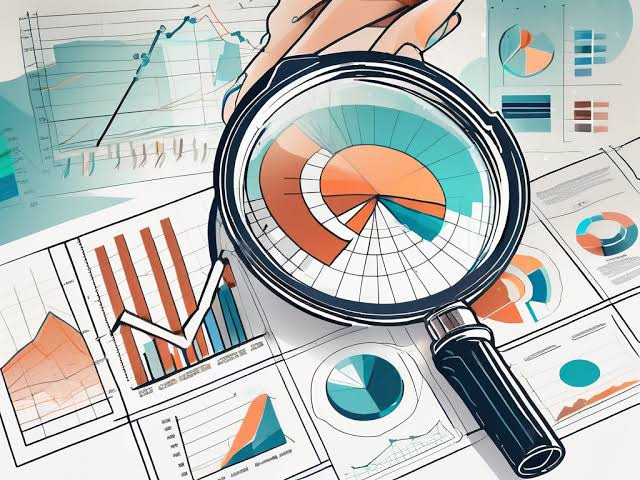

# 📝 Sales Strategy Impact Analysis for Pinnacle's New Product Line

# Project Overview
## Background:
Founded in 1984, Pinnacle Office Supplies Incorporated has established itself as a trusted provider of a wide range of products, including office essentials, paper products, workspace accessories, and technology accessories. Although, they do not manufacture their own products, they collaborate with reputable companies to offer high-quality items to large organizations. Over the years, they have cultivated long lasting relationships with their customers, who rely on them to deliver the best products suited to their needs.

As customer purchasing habits evolve, it is crucial that their sales tactics adapt accordingly. The launch of new expensive products require a strategic approach to ensure effective sales. Since the best sales techniques may differ for each product, they must learn quickly which methods are most successful and which need adjustment.

## Objectives:
To evaluate and adapt the sales strategies for Pinnacle Office Supplies Incorporated in response to the evolving purchasing behaviours of customers, ensuring effective promotion and successful sales of the newly released products.

## Key Questions:
The following critical questions will guide the project and help meet the company's strategic goals

- What specific sales tactics have proven effective based on the sales data pulled up for the six weeks launch period?
- What metrics will the company use to evaluate the success of their new sales strategies?
- How can the company better understand the changing purchasing behaviours of their customers?

# Data Description

The data was obtained from Datacamp. It comprises of a single table of approximatly 15,000 rows and 8 columns. Here is a description of each column of the table.

- **Week**: Week sale was made, counted as weeks since product launch [Integer]
- **Sales Method**: Sales tactics used to sell to a particular customer. There are three distinct types of sales tactics [Character]
- **Customer ID**: Unique identifier for the customers [Character]
- **Nb Sold**: Number of new products sold [Numeric]
- **Revenue**: Revenue from the sales, rounded to 2 decimal places [Numeric]
- **Years as Customer**: Number of years customer has been buying from the company (company founded in 1984) [Numeric]
- **Nb Site Visits**: Number of times the customer has visited our website in the last 6 months [Numeric]
- **State**: Location of the customer i.e. where orders are shipped [Character]

In [1284]:
# Import the packages needed for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from tabulate import tabulate 


# Load the data as a pandas dataframe

product_sales = pd.read_csv("Product Sales.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

print(product_sales.head())

   week  sales_method                           customer_id  nb_sold  revenue  years_as_customer  nb_site_visits      state
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN                  0              24    Arizona
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47                  1              28     Kansas
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55                  6              26  Wisconsin
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN                  3              25    Indiana
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49                  0              28   Illinois


In [1285]:
print(product_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


# Data Normalization

The data normalization will be focused on handling inaccurate, incomplete, and inconsistent data. 

1. **Incomplete data**: These are datasets lacking some of the required or expected information, such as, missing values.
2. **Inconsistent data**: These are datasets that contain conflicting, contradictory, or non-uniform information, such as, wrong data type, duplicate entries, and varying formats
3. **Inaccurate data**: Inaccurate data refers to data that is not reflective of the true value or reality it's intended to represent, such as outdated information, 

Each column in the product sales table was explored. Here's the data validation evaluation for each column:

### Week:
This is the column for the week sale since product launch. It ranges from 1 to 6. This column has the right data type, integer. There are no missing values. And each row in this column is consistent with the data dictionary provided above. 

In [1288]:
print(f"There are {product_sales['week'].nunique()} unique values in the week column")
print(f"The unique values are {product_sales['week'].unique()}")
print(f"The data type of the week column is {product_sales['week'].dtype}")
print(f"The number of missing values in the week column is {product_sales['week'].isnull().sum()}")

There are 6 unique values in the week column
The unique values are [2 6 5 4 3 1]
The data type of the week column is int64
The number of missing values in the week column is 0


### Customer ID:

This is the unique identifier for the customers. It has the right data type. There are no missing values and data is consistent with the data dictionary. No further cleaning is needed here.

In [1290]:
print(f"There are {product_sales['customer_id'].nunique()} unique values in the customer id column")
print(f"The unique values are {product_sales['customer_id'].unique()}")
print(f"The data type of the customer id column is {product_sales['customer_id'].dtype}")
print(f"The number of missing values in the customer id column is {product_sales['customer_id'].isnull().sum()}")

There are 15000 unique values in the customer id column
The unique values are ['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
The data type of the customer id column is object
The number of missing values in the customer id column is 0


### Number of Products Sold: 

It comprises values ranging from 7 to 16. Has the right data type, integer. Also, no missing values here. It is consistent with the description and needs no further cleaning.

In [1292]:
print(f"There are {product_sales['nb_sold'].nunique()} unique values in the number of products sold column")
print(f"The unique values are {product_sales['nb_sold'].unique()}")
print(f"The data type of the number of products sold column is {product_sales['nb_sold'].dtype}")
print(f"The number of missing values in the number of products sold column is {product_sales['nb_sold'].isnull().sum()}")

There are 10 unique values in the number of products sold column
The unique values are [10 15 11  9 13  8 12  7 14 16]
The data type of the number of products sold column is int64
The number of missing values in the number of products sold column is 0


### Number of Site Visits:

This consists of integer values representing the number of times customer visited the website in the last six months. It ranges from 12 to 41. No missing values exists in this column. The data is consistent with the data description, hence, no further cleaning is required here.


In [1294]:
print(f"There are {product_sales['nb_site_visits'].nunique()} unique values in the number of site visits column")
print(f"The unique values are {product_sales['nb_site_visits'].unique()}")
print(f"The data type of the number of site visits column is {product_sales['nb_site_visits'].dtype}")
print(f"The number of missing values in the number of site visits column is {product_sales['nb_site_visits'].isnull().sum()}")

There are 27 unique values in the number of site visits column
The unique values are [24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]
The data type of the number of site visits column is int64
The number of missing values in the number of site visits column is 0


### State: 

It represents the unique 50 geographical location of the customers of the right data type. No missing values and it's consistent. This column has accurate, complete, and consistent data.

In [1296]:
product_sales['state'] = product_sales['state'].astype(str)
print(f"There are {product_sales['state'].nunique()} unique values in the state column")
print(f"The unique values are {product_sales['state'].unique()}")
print(f"The data type of the state column is {product_sales['state'].dtype}")
print(f"The number of missing values in the state column is {product_sales['state'].isnull().sum()}")

There are 50 unique values in the state column
The unique values are ['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']
The data type of the state column is object
The number of missing values in the state column is 0


### Revenue: 

The revenue column has 1074 missing values, which is about 7.16% of the total data. I used the Little's MCAR test to check if the missing values are missing completely at random. Together with visual inspection, the missing values are indeed missing completely at random.

There are 6743 unique values in the revenue column
The data type of the revenue column is float64
The number of missing values in the revenue column is 1074


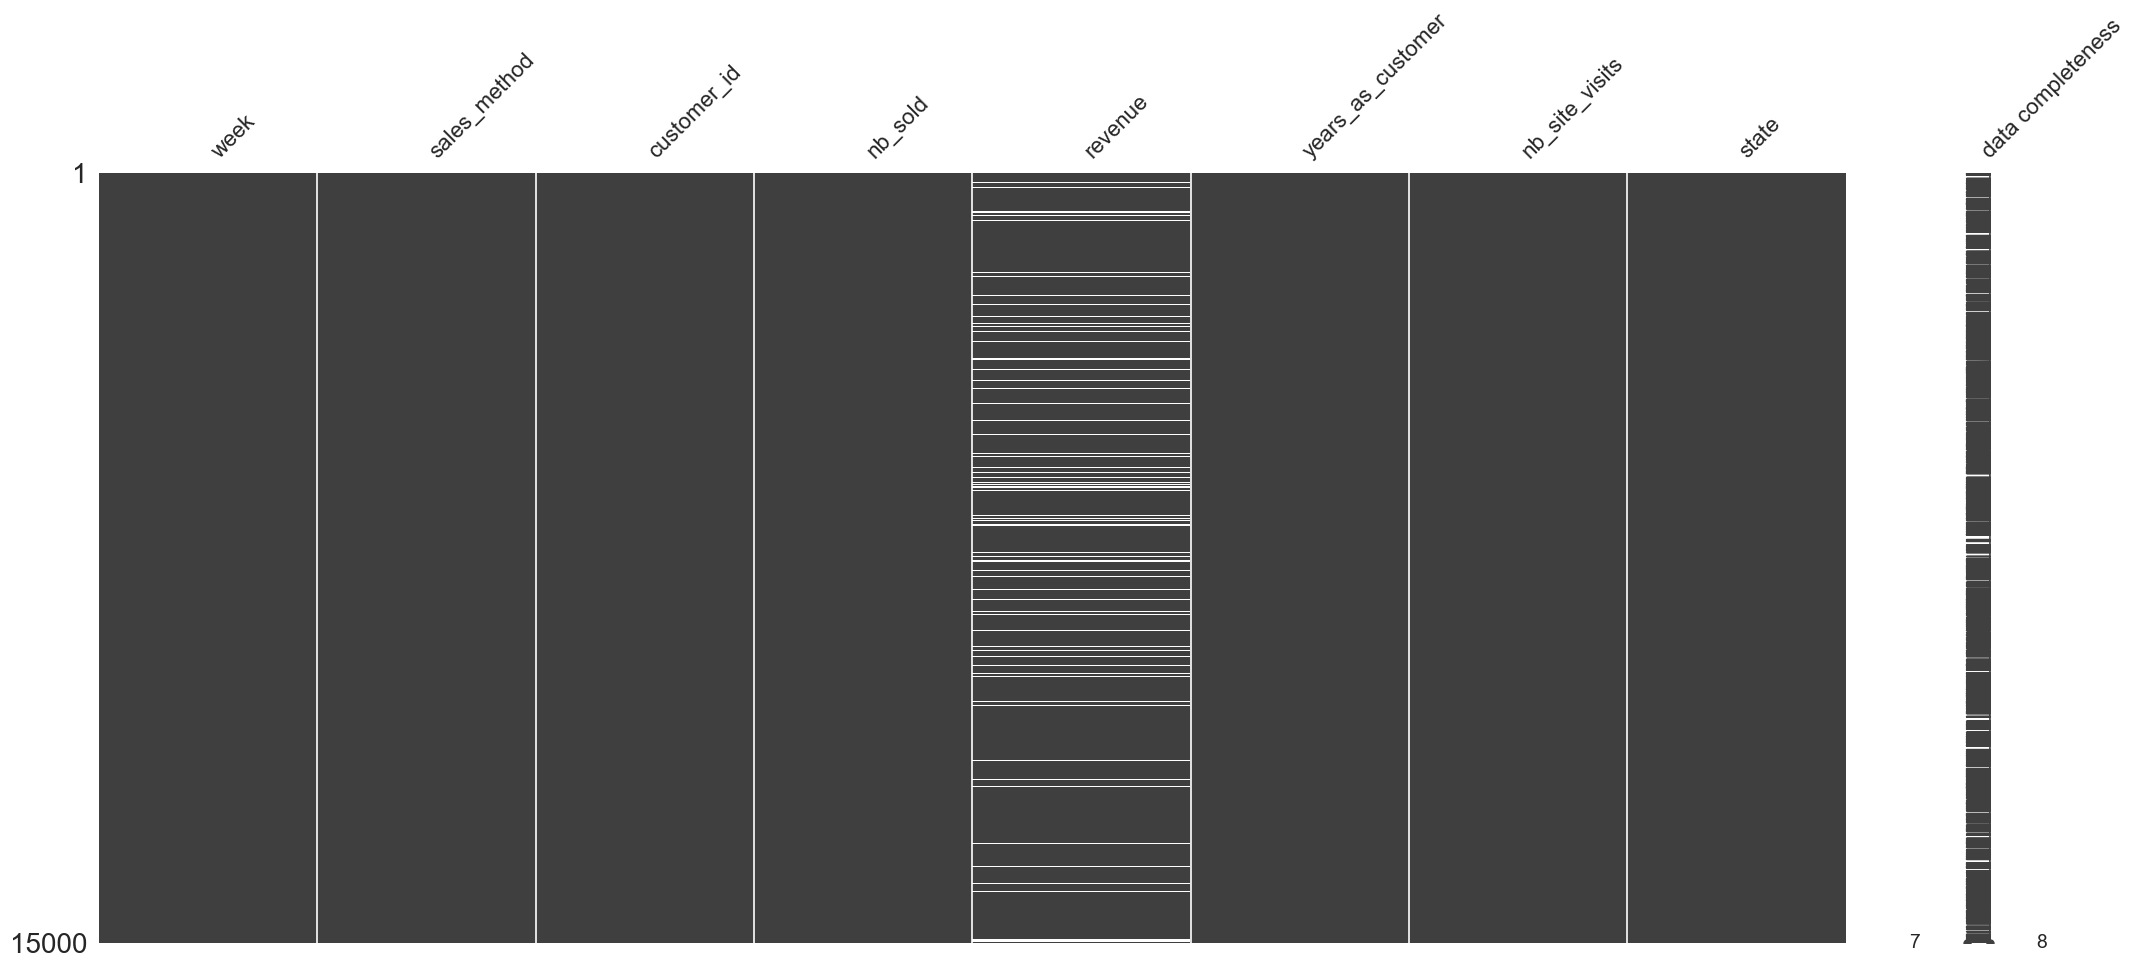

In [1298]:
# Missing Values: To determine if the missing values are random, carry out the Little's MCAR Test

msno.matrix(product_sales, labels=True)
print(f"There are {product_sales['revenue'].nunique()} unique values in the revenue column")
print(f"The data type of the revenue column is {product_sales['revenue'].dtype}")
print(f"The number of missing values in the revenue column is {product_sales['revenue'].isnull().sum()}")

Hence, my way to handle such missing values is to fill it up with the median values for the revenue grouped by the number of products sold column because there are outlier values in the table.

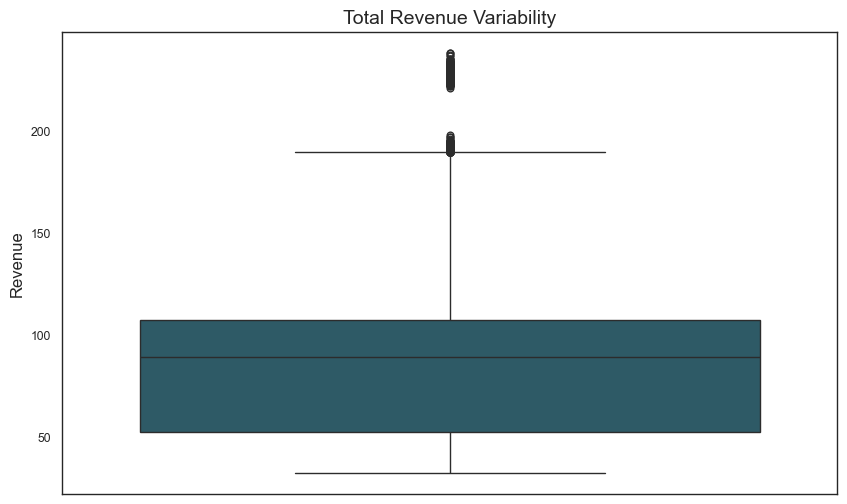

In [1300]:
# Checking for outliers

plt.figure(figsize=(10,6))
sns.set_style("white")
sns.set_palette(["#255F6F"])
sns.set_context("paper")
sns.boxplot(y='revenue', data=product_sales)
plt.ylabel('Revenue', fontsize=12)
plt.title('Total Revenue Variability', fontsize=14)
plt.show()

In [1301]:
# Replace missing values in the revenue column

product_sales['revenue'] = product_sales.groupby('nb_sold')['revenue'].transform(lambda x: x.fillna(x.median()))
print(product_sales.isna().sum())

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


Let's inspect the values in the revenue column again to make sure it stays rounded to two decimal places, based on the data description.

In [1303]:
print(product_sales['revenue'])

0         97.740
1        225.470
2         52.550
3        106.215
4         90.490
          ...   
14995     50.820
14996     52.330
14997     34.870
14998     64.900
14999    128.765
Name: revenue, Length: 15000, dtype: float64


Now, this issue has been corrected, as you can see that all the values in the revenue column has been rounded to two decimal places. Also, the data type still remains the float data type.

In [1305]:
# Round the values in the revenue column to two decimal places

product_sales['revenue'] = product_sales['revenue'].round(2)
print(product_sales['revenue'])

0         97.74
1        225.47
2         52.55
3        106.22
4         90.49
          ...  
14995     50.82
14996     52.33
14997     34.87
14998     64.90
14999    128.76
Name: revenue, Length: 15000, dtype: float64


### Sales Method: 

This column represents the different sales method used to market the new products. There should be three unique identifiers. I checked the sales_method column for data consistency and noticed the rows are not consistent since there should be only three unique values.

In [1307]:
# Check the consistency of data in the sales method column

print(f"There are {product_sales['sales_method'].nunique()} unique values in the sales method column")
print(f"The unique values are {product_sales['sales_method'].unique()}")

There are 5 unique values in the sales method column
The unique values are ['Email' 'Email + Call' 'Call' 'em + call' 'email']


So i replaced 'email' with 'Email and replaced 'em + call' with 'Email + Call'. Now the sales_method column has only 3 distinct values.

In [1309]:
# Replace certain words with the standard version in the sales method column

product_sales['sales_method'] = product_sales['sales_method'].replace({'email': 'Email', 'em + call' : 'Email + Call'})
print(f"There are {product_sales['sales_method'].nunique()} unique values in the sales method column")
print(f"The unique values are {product_sales['sales_method'].unique()}")

There are 3 unique values in the sales method column
The unique values are ['Email' 'Email + Call' 'Call']


### Years As Customer: 

In addition, i discovered incorrect values in the years as customer column. Pinnacle Office Supplies Incorporated was founded in 1984, however, the years as customer column contains values greater than 40. Hence, i will have to replace the numbers greater than 40 with 40 to pass the validation check.

In [1311]:
print(f"There are {product_sales['years_as_customer'].nunique()} unique values in the years as customer column")
print(product_sales[product_sales['years_as_customer'] > 40])

There are 42 unique values in the years as customer column
       week sales_method                           customer_id  nb_sold  revenue  years_as_customer  nb_site_visits       state
13741     2        Email  18919515-a618-430c-9a05-2c7d8fea96af       10    97.22                 63              24  California
13800     4         Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10    50.47                 47              27  California


Now, there are no more values greater than 40 in the years as customer column, after replace the incorrect values with the best right values.

In [1313]:
# Replace values greater than 40 with 40 in years_as_customer column

product_sales.loc[product_sales['years_as_customer'] > 40, 'years_as_customer'] = 40

print(f"There are {product_sales['years_as_customer'].nunique()} unique values in the years as customer column")
print(product_sales[product_sales['years_as_customer'] == 40])
print(product_sales[product_sales['years_as_customer'] > 40])

There are 41 unique values in the years as customer column
       week sales_method                           customer_id  nb_sold  revenue  years_as_customer  nb_site_visits       state
13741     2        Email  18919515-a618-430c-9a05-2c7d8fea96af       10    97.22                 40              24  California
13800     4         Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10    50.47                 40              27  California
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


### Finally, let's check for duplicate values. 

After using the duplicated() method, there are no duplicate values in this table.

In [1315]:
# Check for duplicate value

print(product_sales.duplicated().sum())

0


# Exploratory Data Analysis

### How many customers were there for each approach?

There are about 4962, 7466, and 2572 unique customers for the call, email, and "email + call" sales method respectively. It is inferred that the email sales method yielded more customers compared to the other sales method.

   sales_method  count
0  Email + Call   2572
1          Call   4962
2         Email   7466


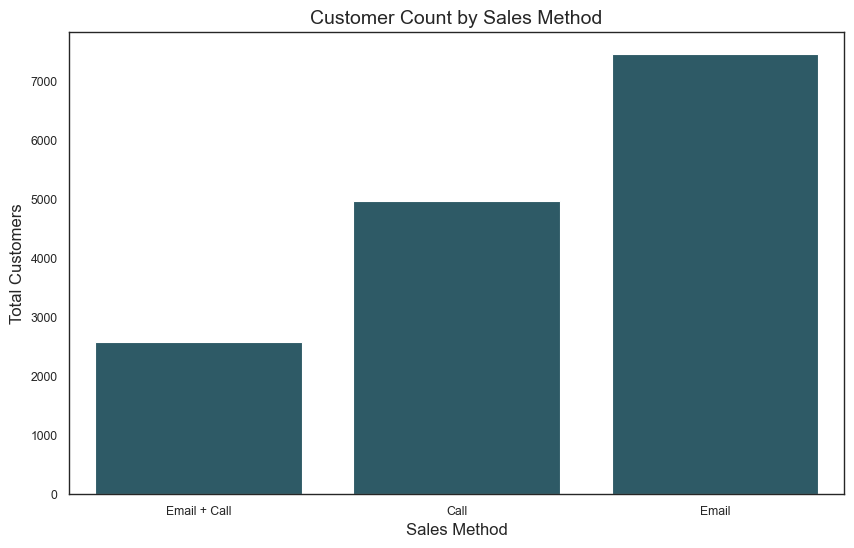

In [1317]:
total_customers_per_approach = product_sales.groupby('sales_method')['customer_id'].count().sort_values().reset_index(name='count')
print(total_customers_per_approach)

plt.figure(figsize=(10,6))
sns.set_style("white")
sns.set_palette(["#255F6F"])
sns.set_context("paper")
sns.barplot(total_customers_per_approach, x='sales_method', y='count')
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Total Customers', fontsize=12)
plt.title('Customer Count by Sales Method', fontsize=14)
plt.show()

### What does the spread of the revenue look like overall? 

The total revenue is 1,435,292.89. The overall minimum, mean, and maximum revenue are 32.54, 95.69, and 238.32 respectively. The standard deviation of the revenue is 47.74. This extreme range of data suggests the possibility of outliers. A large proportion of the data is concentrated between the minimum revenue and the mean revenue, reinforcing the likelihood of a right-skewed distribution. It is important to segment the revenue by various categories such as, product line, geography, customer demographics, or sales method in order to implement targeted solutions which will improve the consistency of the revenue.

The revenue for all the sales of new product is 1435292.8900000001
Below are the measures of spread and center for the data: mean     95.686193
std      47.740726
min      32.540000
max     238.320000
Name: revenue, dtype: float64


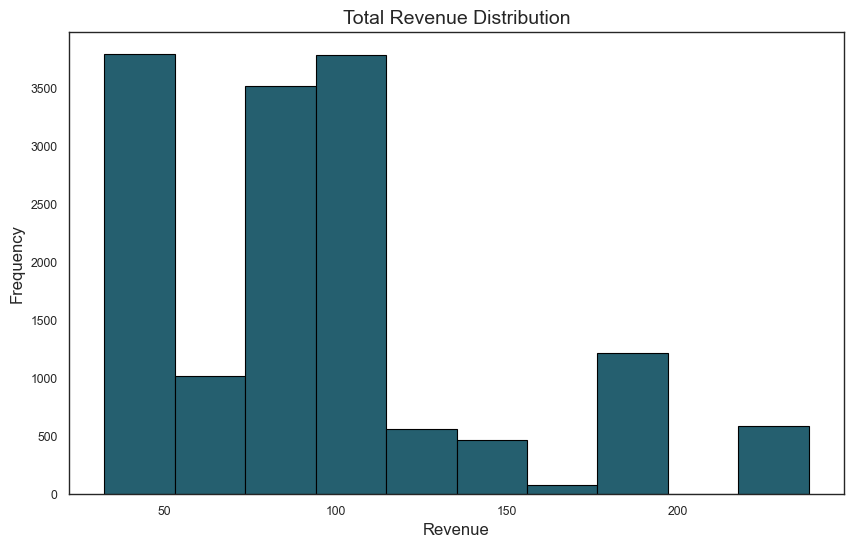

In [1319]:
overall_revenue_summary = product_sales['revenue'].agg(['mean', 'std', 'min', 'max'])
total_revenue = product_sales['revenue'].sum()
print(f"The revenue for all the sales of new product is {total_revenue}")
print(f"Below are the measures of spread and center for the data: {overall_revenue_summary}")

plt.figure(figsize=(10,6))
sns.set_style("white")
sns.set_palette(["#255F6F"])
sns.set_context("paper")
plt.hist(x='revenue', data=product_sales, bins=10, edgecolor='black')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Total Revenue Distribution', fontsize=14)
plt.show()


### What does the spread of revenue look like for each sales method?

The minimum and maximum revenue for the call sales method are 32.54 and 181.79 respectively. The minimum and maximum revenue for the email sales method are 68.93 and 181.79 respectively. The minimum and maximum revenue for the "email + call" sales method are 80.72 and 238.32 respectively. The average revenue for the call, email, and "email + call" sales method are 49.21, 97.13, and 181.15 respectively. The standard deviation of the revenue for the call, email, and "email + call" sales method are 12.67, 11.66, and 33.31 respectively

The revenue obtained using the "email + call" sales method has a higher variability and spread compared to the other sales method. This sales method produces highly inconsistent results, with revenue amounts flunctuating significantly. Understanding what causes this variation can help optimize the method. It could also indicate the method is effective in certain scenarios, but underperform in others, indicating the need for targeted use.

Conversely, the email sales method generates revenue with much lesser variability and spread. This lowers the financial risk since the company can better predict future revenues. While consistency is beneficial, it may also imply limited growth potential compared to methods that generate higher variability but offer the possibility for rapid expansion or spikes in revenue.

                    mean        std    min     max        sum
sales_method                                                 
Call           49.206366  12.665648  32.54  181.79  244161.99
Email          97.134941  11.660578  68.93  181.79  725209.47
Email + Call  181.151411  33.308503  80.72  238.32  465921.43


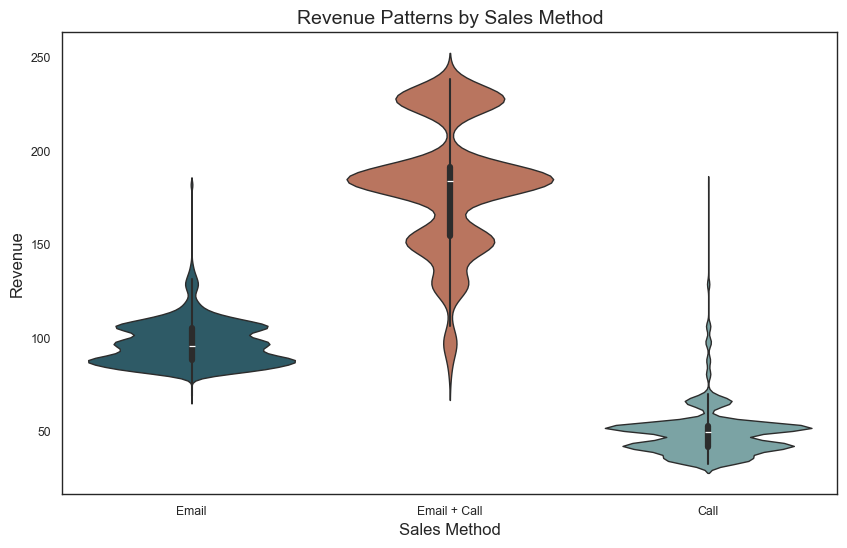

In [1321]:
method_revenue = product_sales.groupby('sales_method')['revenue'].agg(['mean', 'std', 'min', 'max', 'sum'])
print(method_revenue)

plt.figure(figsize=(10,6))
sns.set_style("white")
sns.set_palette(["#255F6F", "#C86D50", "#74AAAB"])
sns.set_context("paper")
sns.violinplot(x='sales_method',y='revenue', data=product_sales, hue='sales_method', split=False, inner='box')
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue Patterns by Sales Method', fontsize=14)
plt.show()

### Was there any difference in revenue over time for each of the methods?

There is a difference in revenue over time for each of the sales methods. In the first week, the email sales method leads the call sales method by 219,189.42 and "email + call" sales method by 227,680.53. In week 2 - 4, the email sales method lead other methods. However, in week 5 and week 6, the email sales method comes second and third respectively. Based on these results, the email sales method yielded more revenue four consecutive times, as such, it should be prioritized for consistent revenue generation.

                     revenue
week sales_method           
1    Call           26835.92
     Email         246025.34
     Email + Call   18344.81
2    Call           36397.85
     Email         148710.38
     Email + Call   29244.61
3    Call           39042.64
     Email         106653.67
     Email + Call   52158.04
4    Call           53669.17
     Email         117148.87
     Email + Call   89355.06
5    Call           57439.02
     Email          80964.13
     Email + Call  144071.76
6    Call           30777.39
     Email          25707.08
     Email + Call  132747.15


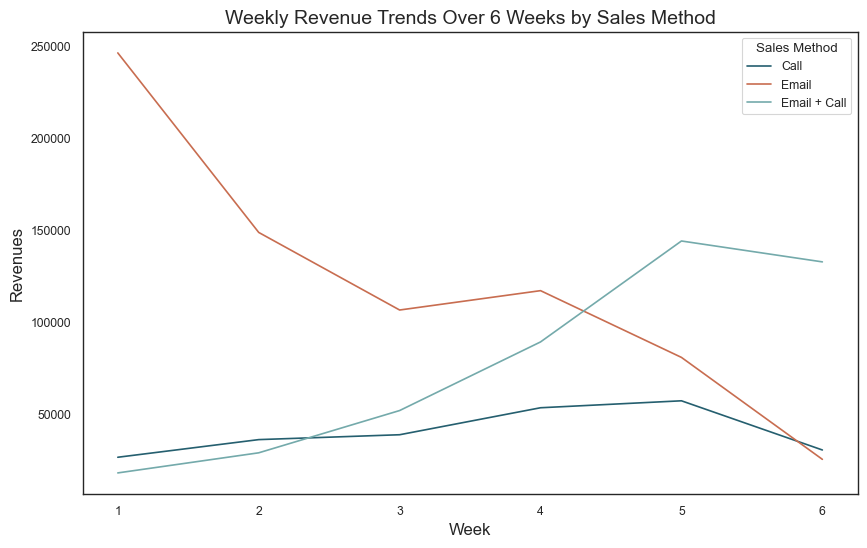

In [1323]:
product_sales_in_time_call = product_sales[product_sales['sales_method'] == "Call"].groupby('week')['revenue'].sum()
product_sales_in_time_email = product_sales[product_sales['sales_method'] == "Email"].groupby('week')['revenue'].sum()
product_sales_in_time_email_call = product_sales[product_sales['sales_method'] == "Email + Call"].groupby('week')['revenue'].sum()

product_sales_in_time = product_sales.pivot_table(values='revenue' , index=['week', 'sales_method'] , aggfunc='sum')
print(product_sales_in_time)

plt.figure(figsize=(10,6))
sns.set_style("white")
sns.set_palette(["#255F6F", "#C86D50", "#74AAAB"])
sns.set_context("paper")
sns.lineplot(product_sales_in_time_call, label='Call')
sns.lineplot(product_sales_in_time_email, label='Email')
sns.lineplot(product_sales_in_time_email_call, label='Email + Call')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenues', fontsize=12)
plt.legend(title='Sales Method')
plt.title('Weekly Revenue Trends Over 6 Weeks by Sales Method', fontsize=14)
plt.show()

### How should the business monitor what they want to achieve? And estimate the initial value(s) for the metric based on the current data?

To monitor the success of the new products, the following metrics should be used: total revenue, total number of products sold, and total number of customers.

1. **Total Revenue** - Total revenue is the total amount of money generated by the sales of goods over a specified period of time
2. **Total Products Sold** - Total products sold is the sum of the total number of products each customers buys
3. **Total Customers** - Total customers is the count of the unique number of customers who buys the new product

If the email sales method is the preferred sales method, the total revenue, total customers, and total products of 725,209, 7,466, and 72,639 respectively will act as the baseline for future sales. Increase in any of the metrics will reveal positive outcomes of the implemented strategies while the decrease in any of the metrics will reveal negative outcomes of the sales strategy.

It is important to create a realistic forcast for sales, considering the decline in the metrics using the email sales method in weeks 5 to 6. Factors such as email fatigue, email timing, content relevance, market competition, seasonal trends, and technical issues should be explored to ascertain the reason behind the metric decline in order to improve the sales outcome.  


In [1325]:
# Metrics (Overall)

total_revenue = product_sales.groupby('sales_method')['revenue'].agg('sum').reset_index().rename(columns={'sales_method': 'Sales Method', 'revenue':'Total Revenue'})
total_customers = product_sales.groupby('sales_method')['customer_id'].agg('count').reset_index().rename(columns={'sales_method': 'Sales Method', 'customer_id':'Total Customers'})
total_products = product_sales.groupby('sales_method')['nb_sold'].agg('sum').reset_index().rename(columns={'sales_method': 'Sales Method', 'nb_sold':'Total Products'})

table_revenue = tabulate(total_revenue, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "left"))
table_customers = tabulate(total_customers, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "left"))
table_products = tabulate(total_products, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "left"))

table_combined = f"{table_revenue}\n\n{table_customers}\n\n{table_products}"
print(table_combined)


# Metrics (Weekly)

pivot_table = product_sales.pivot_table(values=['revenue', 'nb_sold', 'customer_id'], index=['week', 'sales_method'], aggfunc={'revenue':'sum', 'nb_sold':'sum', 'customer_id':'count'}).reset_index().rename(columns={'week': 'Weeks', 'sales_method':'Sales Method', 'revenue': 'Total Revenue', 'nb_sold': 'Total Products', 'customer_id': 'Total Customers'})

table = tabulate(pivot_table, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("center", "left", "right", "right", "right"))
print(table)

╒════════════════╤═════════════════╕
│ Sales Method   │ Total Revenue   │
╞════════════════╪═════════════════╡
│ Call           │ 244162          │
├────────────────┼─────────────────┤
│ Email          │ 725209          │
├────────────────┼─────────────────┤
│ Email + Call   │ 465921          │
╘════════════════╧═════════════════╛

╒════════════════╤═══════════════════╕
│ Sales Method   │ Total Customers   │
╞════════════════╪═══════════════════╡
│ Call           │ 4962              │
├────────────────┼───────────────────┤
│ Email          │ 7466              │
├────────────────┼───────────────────┤
│ Email + Call   │ 2572              │
╘════════════════╧═══════════════════╛

╒════════════════╤══════════════════╕
│ Sales Method   │ Total Products   │
╞════════════════╪══════════════════╡
│ Call           │ 47187            │
├────────────────┼──────────────────┤
│ Email          │ 72639            │
├────────────────┼──────────────────┤
│ Email + Call   │ 31444            │
╘═════════

### Is there a connection between the years the customer has stayed with the company and the total customers who bought the new products?

I decided to explore if there is any relationshp between the number of years a customer has been buying from Pinnacle Office Supplies Incorporated and the customer count. From the pivot table, customers who have stayed with the company between 0 and 10 years have the highest customer count compared to the others. These could be due to many reasons, such as, product preferences, purchasing behaviours, or technical know-how. Tailoring products and marketing campaigns based on audience segmentation is a relevant recommendation.

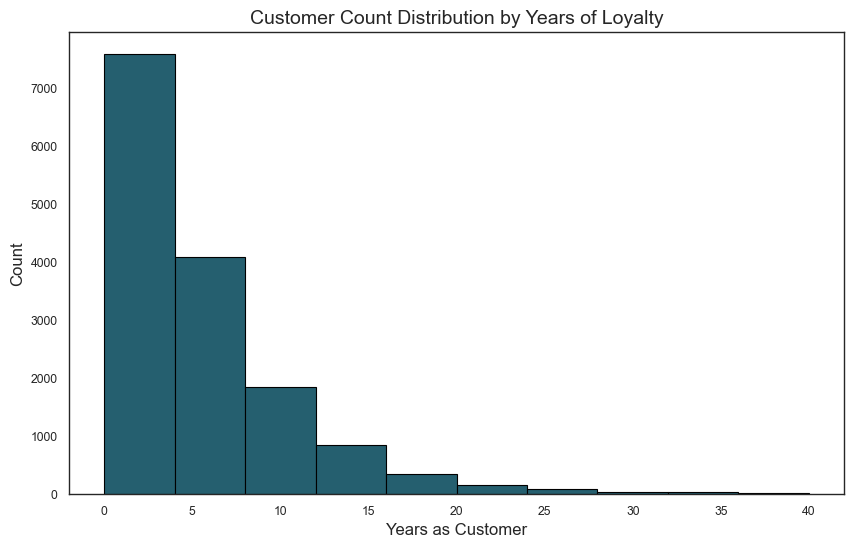

In [1327]:
any_relationship = product_sales.groupby('years_as_customer')['customer_id'].count().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.set_style("white")
sns.set_palette(["#255F6F"])
sns.set_context("paper")
plt.hist(product_sales['years_as_customer'], bins=10, edgecolor='black')
plt.xlabel('Years as Customer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Customer Count Distribution by Years of Loyalty', fontsize=14)
plt.show()

### What influences the number of products sold: years as customer and/or the number of site visits??

The first scatterplot suggests that newer customers are purchasing more products compared to older customers with the 'email + call' sales method converting potential customers into high-volume buyers while the second scatterplot suggests that the site traffic is positively impacting the number of products sold with the 'email + call' sales method converting potential customers into high-volume buyers, as well. If newer customers tend to buy more, limited-time offers can be capitalized to drive more traffic to the website, further increasing sales. Phone calls can be leveraged to retarget customers with high number of site visits, but little to no products purchased.

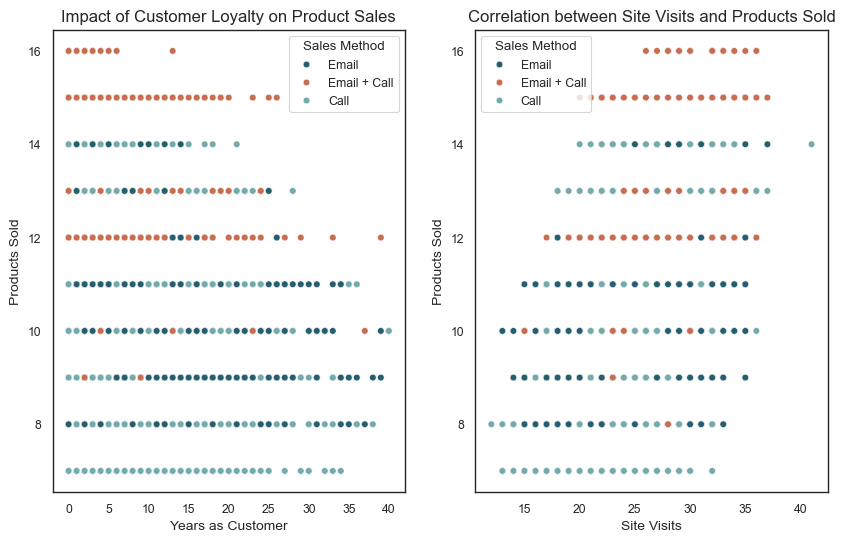

In [1329]:
sns.set_style("white")
sns.set_palette(["#255F6F", "#C86D50", "#74AAAB"])
sns.set_context("paper")
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(x='years_as_customer', y='nb_sold', ax=ax[0], data=product_sales, hue='sales_method')
sns.scatterplot(x='nb_site_visits', y='nb_sold', ax=ax[1], data=product_sales, hue='sales_method')
ax[0].set_xlabel('Years as Customer', fontsize=10)
ax[0].set_ylabel('Products Sold', fontsize=10)
ax[1].set_xlabel('Site Visits', fontsize=10)
ax[1].set_ylabel('Products Sold', fontsize=10)
ax[0].set_title('Impact of Customer Loyalty on Product Sales', fontsize=12)
ax[1].set_title('Correlation between Site Visits and Products Sold', fontsize=12)
ax[0].legend(title='Sales Method')
ax[1].legend(title='Sales Method')
plt.show()

### Are specific states associated with a higher customer count?

The highest proportion of customers who bought the new products are from California, yielding the highest revenue compared to other geographical states. This indicates a strong economic performance in the state. Targeted marketing campaigns can be developed for high revenue-generating geographical states.

The dominant state with the highest number of revenue is California


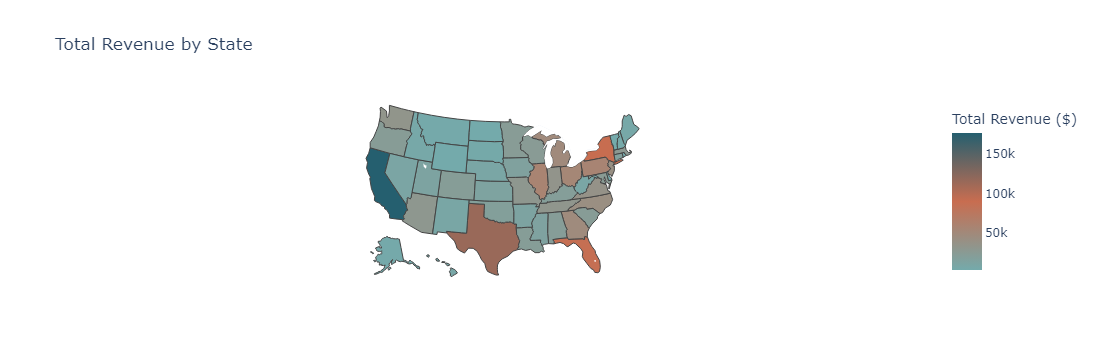

In [1331]:
# Dominant State

dominant_state = product_sales.groupby('state')['customer_id'].count().sort_values(ascending=False).idxmax()
print(f"The dominant state with the highest number of revenue is {dominant_state}")


# Map Plot

state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}
map_state = product_sales.groupby('state')['revenue'].sum().sort_values(ascending=False).reset_index(name='total_revenue')
map_state['State'] = map_state['state'].map(state_abbreviations)


local_topojson_path = r'C:\Users\User\Downloads\usa_110m.json'
with open(local_topojson_path) as f: 
    topojson_data = json.load(f)
    
fig = px.choropleth(map_state, locations='State', color='total_revenue', hover_name='state', scope="usa", geojson=topojson_data, featureidkey='properties.name', locationmode='USA-states', color_continuous_scale=['#74AAAB','#C86D50', '#255F6F'], labels={'total_revenue': 'Total Revenue ($)'}, title='Total Revenue by State')
fig.update_traces(hovertemplate="<br>".join([
    "State: %{location}",
    "Total Revenue: $%{z:,}"
]))
fig.show()

# Recommendation

1. **Automated Data Entry Systems:** Implement systems that can capture revenue data in real-time, reducing the chances of human errors or delays in data entry. Implement validation rules to ensure that the revenue field is mandatory to avoid missing values.
   
2. **Email Sales Method Adoption:** After thorough analysis, the recommended cost-effective sales method is the email sales method. This method recorded the highest revenue and customer count of 725,209.47 and 7,466 respectively. The emails sent in week 1 recorded the highest revenue per week of 246,025.34, hence, the campaign for that week should be analyzed to identify success factors, which should be replicated for future campaigns. Since, email is the recommended sales method, we need to check why the email sales method yielded low revenues of 80,964.13 in week 5 and 25,707.08 in week 6. It's important to review email open rates, evaluate content for relevance, inspect visual appeal and call to actions (CTAs), review audience segmentation, and optimize email sending times to avoid the low turnout in future campaigns. Please, don't forget to scrutinize the customer service quality via emails.

3. **Customer Retention Programs:** A higher percentage of the total customer count are customers who have stayed with the company between 0 to 10 years. Therefore, data analytics can be deployed to understand long-term customers product preferences and purchasing behaviour. Strengthen loyalty programs to reward long-term customers for more frequent purchases. This can include discounts or exclusive offers for customers reaching specific milestones (e.g. 10 or 20 years of loyalty).

4.  **Continuous Innovation:** Offer products that meet the evolving needs of different segments of the customers. This will keep the offers fresh and increase the likelihood that customers will stay longer.

5.  **Leverage Customer Retargeting:** Since site visits correlate positively with higher sales, implement retargeting campaigns for visitors who don't make an immediate purchase or buy a high number of products even though they have visited the website a couple of times. Phone calls can help convert those potential customers into buyers or low-volume buyers into power buyers, especially potential customers from high revenue-generating regions, through personalized follow-up and complementary product offers.